In [10]:
%pip install numpy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240415.csv")

data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


#### Report the total number of crimes in the dataset.

In [12]:
total_number_of_crimes = data.shape[0];
print(total_number_of_crimes)

2129525


#### List the various categories of crime. How many are there?

In [13]:
crime_categories = data['Category'].unique()
num_crime_categories = len(crime_categories)
print(num_crime_categories)

37


#### List the number of crimes in each category.

In [14]:
# Count the number of crimes in each category
crime_counts = data['Category'].value_counts()

# Print the number of crimes in each category
print("Number of crimes in each category:")
print(crime_counts)

Number of crimes in each category:
Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79087
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
SEX OFFENSES, FORCIBLE           8747
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4282
ARSON 

#### What is the year with most crimes?

In [15]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Count the number of crimes in each year
yearly_crime_counts = data['Year'].value_counts()

# Find the year with the most crimes
most_criminal_year = yearly_crime_counts.idxmax()

# Print the year with the most crimes
print("Year with the most crimes:", most_criminal_year)

Year with the most crimes: 2015


#### What is the year with the fewest crimes? (hint if your result is 2018, go back and see what I wrote about the date range up in exercise 1).

In [16]:
# Exclude the year 2018 from the DataFrame
data_without_2018 = data[data['Year'] != 2018]

# Count the number of crimes in each year (excluding 2018)
yearly_crime_counts_without_2018 = data_without_2018['Year'].value_counts()

# Find the year with the fewest crimes (excluding 2018)
fewest_crime_year = yearly_crime_counts_without_2018.idxmin()

# Print the year with the fewest crimes
print("Year with the fewest crimes (excluding 2018):", fewest_crime_year)

Year with the fewest crimes (excluding 2018): 2011


#### Create a barplot of crimes-per-year (years on the -axis, crime-counts on the -axis).

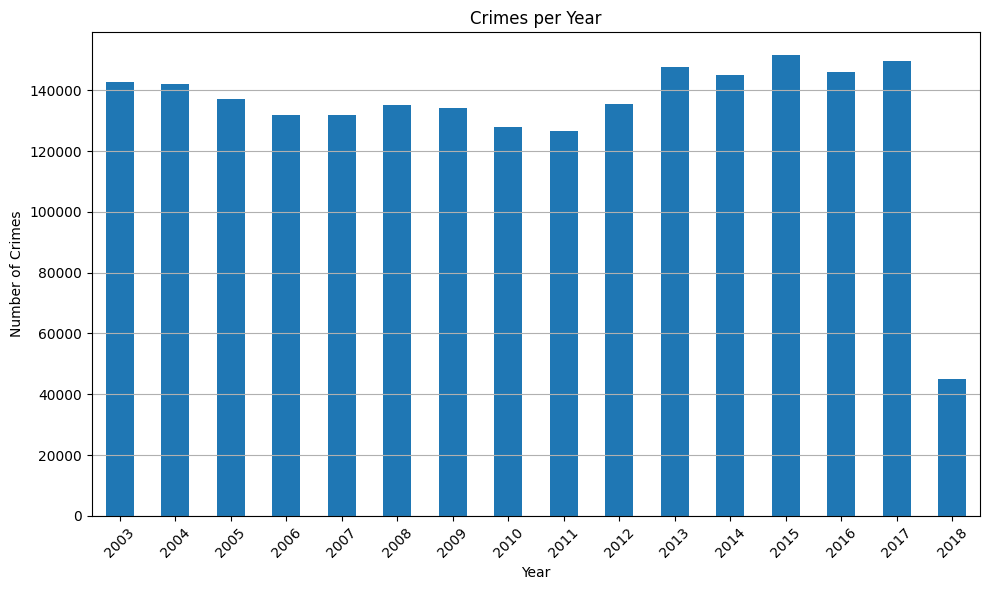

In [17]:
# Group the data by year and count the number of crimes in each year
crime_counts_per_year = data.groupby('Year').size()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts_per_year.plot(kind='bar')
plt.title('Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Final task 
Police chief `Suneman` is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

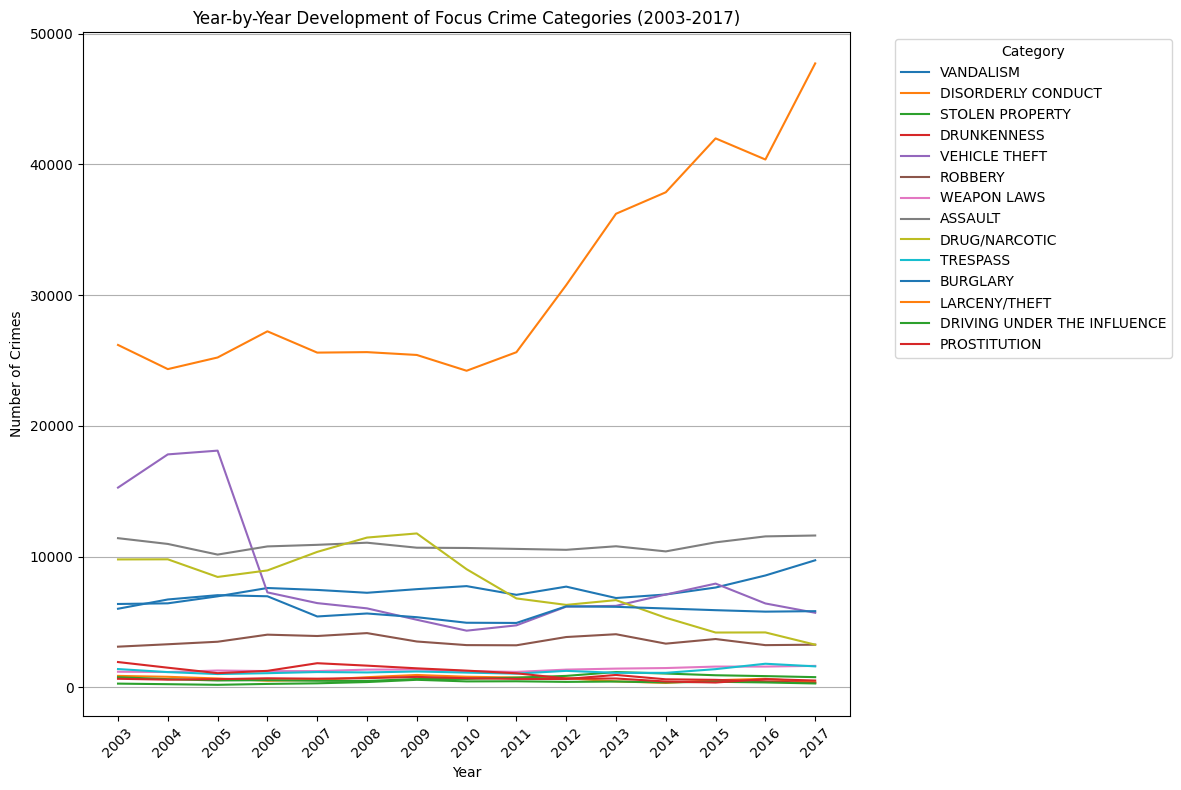

In [21]:
# List of focus crime categories
focuscrimes = set([
    'WEAPON LAWS', 
    'PROSTITUTION', 
    'DRIVING UNDER THE INFLUENCE', 
    'ROBBERY', 
    'BURGLARY', 
    'ASSAULT', 
    'DRUNKENNESS', 
    'DRUG/NARCOTIC', 
    'TRESPASS', 
    'LARCENY/THEFT', 
    'VANDALISM', 
    'VEHICLE THEFT', 
    'STOLEN PROPERTY', 
    'DISORDERLY CONDUCT'
])


# Filter the data for focus crimes and years 2003-2017
focus_crimes_data = data[(data['Category'].isin(focuscrimes)) & (data['Year'] >= 2003) & (data['Year'] <= 2017)]

# Group the filtered data by year and category, and count the number of crimes in each year-category combination
crime_counts_per_year_category = focus_crimes_data.groupby(['Year', 'Category']).size().unstack()

# Create a bar plot for each focus crime category
plt.figure(figsize=(12, 8))
for category in focuscrimes:
    crime_counts_per_year_category[category].plot(kind='line', label=category)

plt.title('Year-by-Year Development of Focus Crime Categories (2003-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2003, 2018), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()